In [1]:
import jade
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from functools import reduce
from operator import mul

In [2]:
def goldstein_price(varg : np.ndarray):
    x = varg[0]
    y = varg[1]
    term1 = 1 + ((x + y + 1)**2) * (19 - 14*x + 3*x** 2 - 14*y + 6*x*y + 3*y**2)
    term2 = 30 + ((2*x - 3*y)**2) * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2)
    return term1 * term2

def myf(x):
    return reduce(mul, x)

def rosenbrock(args):
    sum = 0
    for i in range(len(args)-1):
        sum += 100*(args[i+1] - args[i]**2)**2 + (1 - args[i])**2
    return sum


def sphere(args):
    return sum(map(lambda x: x**2, args))

In [3]:

dim = int(10)
params = jade.get_default_params(dim)
params['bounds'] = np.array([[-2, 2]] * dim) 
params['func'] = sphere
params['opts'] = None
func_min = 0

# res = jade.apply(population_size, individual_size, bounds, func, opts, p, c, callback, max_evals, seed)
# print(f"f minimum: {res['optimum_value']}, mean: {res['gen_mean_fval']} at {res['optimum_point']}")

## random run data
#rand_run_alg_analytics = {'median individ' :res[2],
#               'mean individ':res[3]}

# print(rand_run_alg_analytics['mean individ'])

In [4]:
marathon_len = 10
marathon_analytics = {'median' : np.ones((marathon_len, params['max_evals'] // params['population_size'])),
                      'mean' : 0 * np.ones((marathon_len, params['max_evals'] // params['population_size']))}

runs_generation_count = np.zeros(shape=(1, marathon_len))

for run_number in range(marathon_len):
    # print(run_number+1)
    run_res = jade.apply(**params)
    #marathon_analytics['median'][run_number] = run_res[2]
    print(run_res['optimum_value'])
    runs_generation_count[0, run_number] = run_res['gen_best_fval'].shape[0]
    marathon_analytics['mean'][run_number][:run_res['gen_best_fval'].shape[0]] = run_res['gen_best_fval']

print(runs_generation_count[0])
#marathon_median = np.mean(marathon_analytics['median'][:], axis=0)
marathon_mean = np.mean(marathon_analytics['mean'][:], axis=0) 



8.90527337944604e-05
7.817921900428937e-05
5.929394207435188e-05
0.0001898412101777581
0.0001314177928408273
0.0002192146828698224
0.00018443258987015023
0.00011017572555450037
0.00012676706354307959
0.00011047796815105441
[69. 69. 70. 66. 68. 60. 68. 68. 66. 63.]


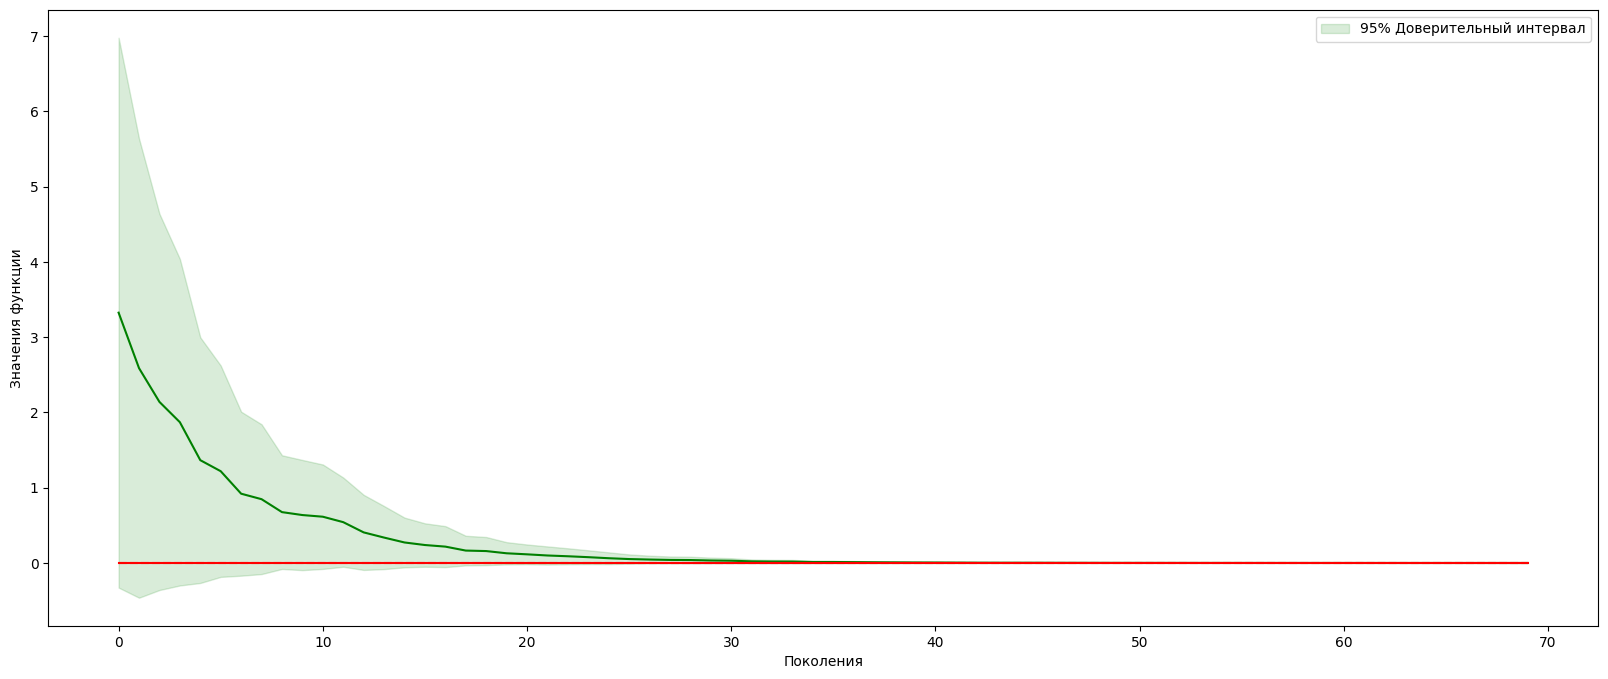

In [5]:
data=marathon_analytics['mean'][:, :int(np.max(runs_generation_count))]
confidence = 0.95
mean = np.mean(data,axis=0)
sem = stats.sem(data,axis=0)
interval = stats.t.interval(confidence, len(data) - 1, loc=mean, scale=sem)
fig,ax = plt.subplots(figsize=(20, 8))
ax.plot(np.array(range(mean.shape[0])), mean,color='green')
ax.fill_between(x=np.array(range(mean.shape[0])), y1=interval[1]+mean, y2=interval[0]-mean, color='green', alpha=0.15, label='95% Доверительный интервал')
plt.xlabel('Поколения')
plt.ylabel('Значения функции')
ax.plot(np.array(range(mean.shape[0])), [func_min]*mean.shape[0], color='red', linestyle= '--')
ax.plot(np.array(range(mean.shape[0])), [0]*mean.shape[0], color='red', linestyle= '-')
# ax.set_yticks([func_min, 0], [f'func min = {func_min}', '0'])
ax.legend()
plt.savefig('./confidence_interval.png', bbox_inches='tight')
plt.show()
plt.close()